In [2]:
library('igraph')
library('Matrix')
library('pracma')


Attaching package: 'igraph'


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:base':

    union



Attaching package: 'pracma'


The following objects are masked from 'package:Matrix':

    expm, lu, tril, triu




In [3]:
# GCC logic provided by TA Arash
get_GCC = function(g) {
    g.components <- clusters(g)
    ix <- which.max(g.components$csize)
    gcc <- induced.subgraph(g, which(g.components$membership == ix))
    
    return (gcc)
}

# ER model question 1a and 1b
er_1ab = function(n=1000, p, iterations=100) {
    set.seed(0)
    g = erdos.renyi.game(n, p, directed=F)
    plot(g, vertex.size=1, vertex.label=NA)
    plot(degree.distribution(g), main=paste("Degree distribution with p = ", p), xlab="Degree", ylab="Frequency")
    
    # 1a
    print(paste("Mean: ", mean(degree(g))))
    print(paste("Variance: ", var(degree(g))))
    
    # 1b
    # To numerically approximate, we create 100 graphs for each p
    n_connected = 0
    connected = TRUE
    for (i in 1:iterations) {
        g_i = erdos.renyi.game(n, p, directed=F)
        if (is_connected(g_i)) {
            n_connected = n_connected + 1
        } else {
            connected = FALSE
            # need an unconnected graph for later
            unconnected_graph = g_i
        }
    }
    
    print(paste("All realizations connected: ", connected))
    print(paste("Probability to be connected: ", (n_connected / iterations)))
    
    if (!connected) {
        gcc = get_GCC(unconnected_graph)
        print(paste("Diameter of GCC: ", diameter(gcc)))
    }    
}

# ER model question 1c
er_1c = function(n=1000, p0=0.0000, pmax=0.0100) {
    # p from 0 to 0.01, which makes the network connected 99% of the time according to 1b
    
    GCC_sizes = c()
    ps = seq(from=p0, to=pmax, by=0.0001)
    for (p in ps) {
        sizes_per_p = c()
        for (i in 1:100) {
            g = erdos.renyi.game(n, p, directed=F)
            # store GCC sizes for current p
            sizes_per_p = c(sizes_per_p, max(clusters(g)$csize))
        }
        # store normalized GCC sizes
        GCC_sizes = c(GCC_sizes, mean(sizes_per_p)/n)
    }
    plot(ps, GCC_sizes, main="Normalized GCC sizes vs p", xlab="p values", ylab="normalized GCC sizes")
}

# ER model question 1d
er_1d = function(c, nmin=100, nmax=10000) {
    
    GCC_sizes = c()
    ns = seq(nmin,nmax,100)
    for (n in ns) {
        sizes_per_n = c()
        for (i in 1:100) {
            g = erdos.renyi.game(n, p=(c/n), directed=F)
            sizes_per_n = c(sizes_per_n, max(clusters(g)$csize))
        }
        GCC_sizes = c(GCC_sizes, mean(sizes_per_n))
    }
    plot(ns, GCC_sizes)
}

er_1dAlt = function(cs=c(1.1, 1.2, 1.3),  nmin=100, nmax=10000) {

    ns = seq(nmin,nmax,50)
    # couldn't get my vector of C values to work, so this will do for now...
    GCC_sizes1 = c()
    for (n in ns) {
        sizes_per_n = c()
        for (j in 1:100) {
            g = erdos.renyi.game(n, p=(cs[1]/n), directed=F)
            sizes_per_n = c(sizes_per_n, max(clusters(g)$csize))
        }
        GCC_sizes1 = c(GCC_sizes1, mean(sizes_per_n))
    }
    
    GCC_sizes2 = c()
    for (n in ns) {
        sizes_per_n = c()
        for (j in 1:100) {
            g = erdos.renyi.game(n, p=(cs[2]/n), directed=F)
            sizes_per_n = c(sizes_per_n, max(clusters(g)$csize))
        }
        GCC_sizes2 = c(GCC_sizes2, mean(sizes_per_n))
    }
    
    GCC_sizes3 = c()
    for (n in ns) {
        sizes_per_n = c()
        for (j in 1:100) {
            g = erdos.renyi.game(n, p=(cs[3]/n), directed=F)
            sizes_per_n = c(sizes_per_n, max(clusters(g)$csize))
        }
        GCC_sizes3 = c(GCC_sizes3, mean(sizes_per_n))
    }
    
    plot(ns, GCC_sizes1, main="GCC size vs n with c=1.1, 1.2, 1.3", xlab="n", ylab="GCC sizes", col="#FF0000")
    points(ns, GCC_sizes2, col="#00FF33")
    points(ns, GCC_sizes3, col="#0000CC")
    legend("topleft", c("c=1.1","c=1.2", "c=1.3"), col=c("#FF0000","#00FF33","#0000CC"), pch=c(16,16,16))
}

[1] "Problem 1"


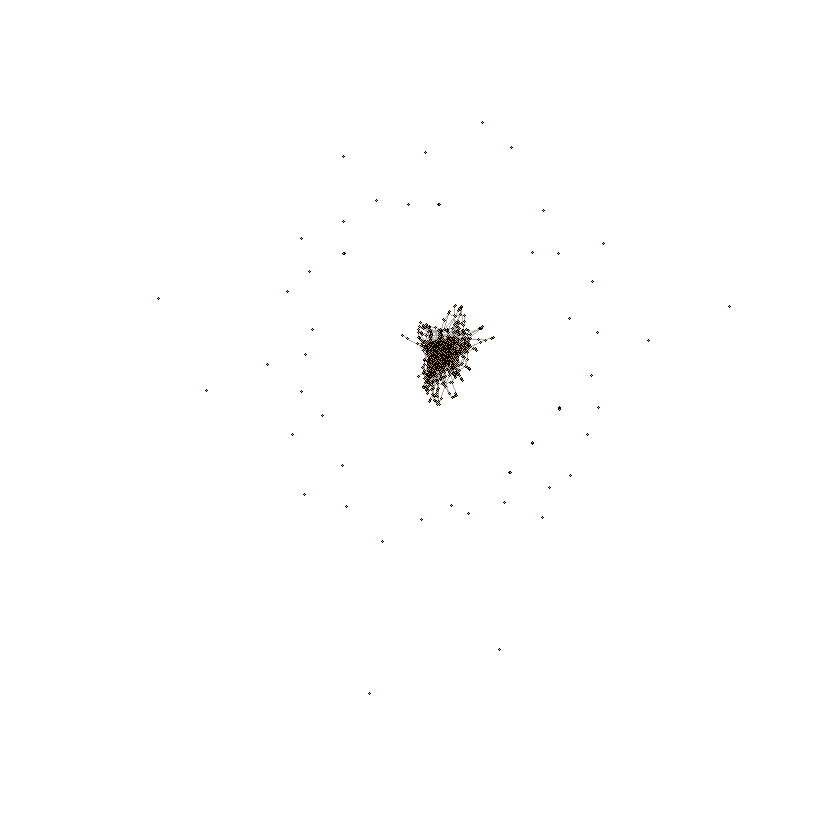

[1] "Mean:  3.122"
[1] "Variance:  3.30842442442442"
[1] "All realizations connected:  FALSE"
[1] "Probability to be connected:  0"
[1] "Diameter of GCC:  14"


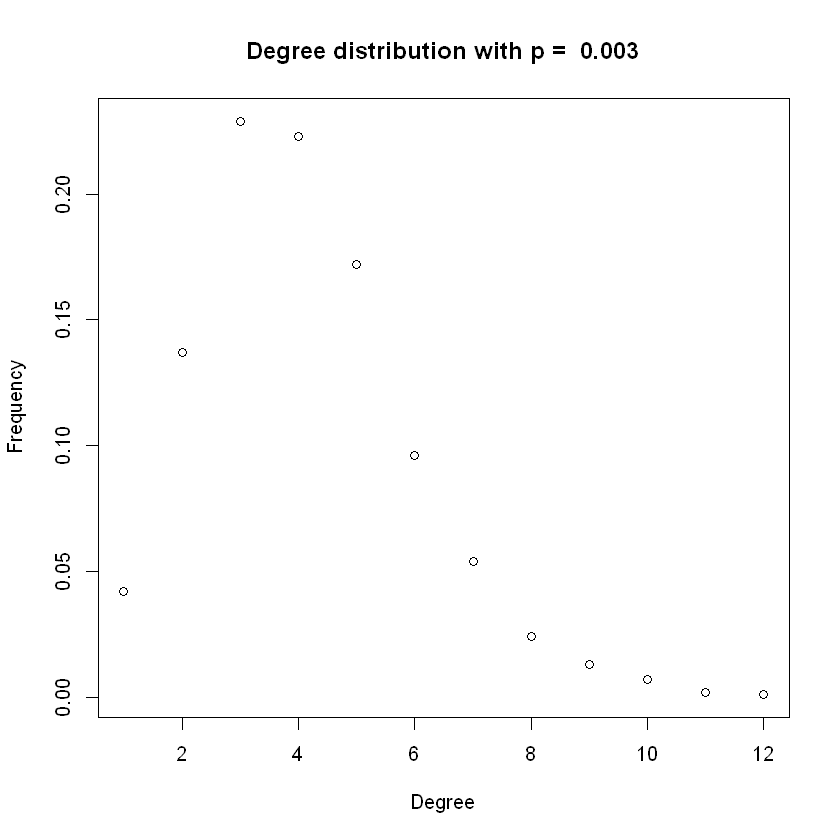

In [28]:
print("Problem 1")
er_1ab(p=0.003)

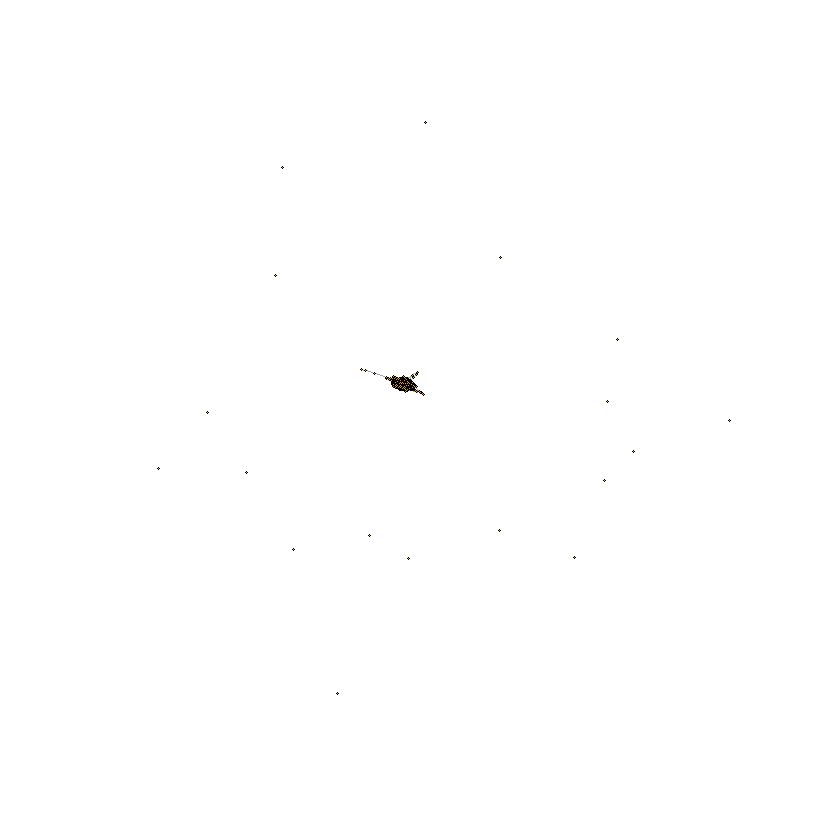

[1] "Mean:  4.034"
[1] "Variance:  3.91876276276276"
[1] "All realizations connected:  FALSE"
[1] "Probability to be connected:  0"
[1] "Diameter of GCC:  11"


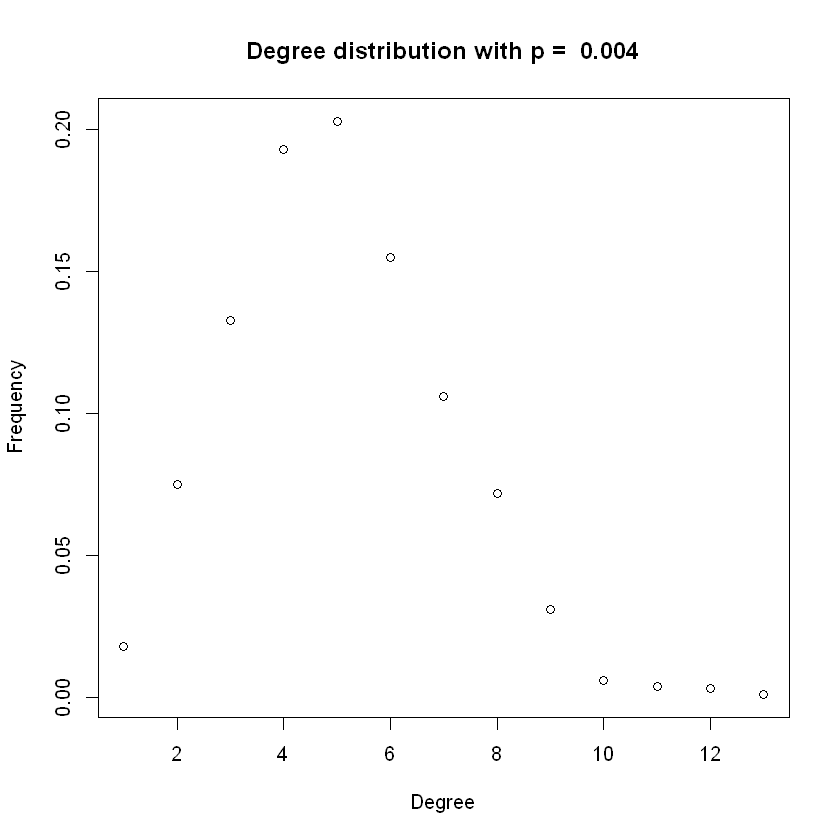

In [10]:
er_1ab(p=0.004)

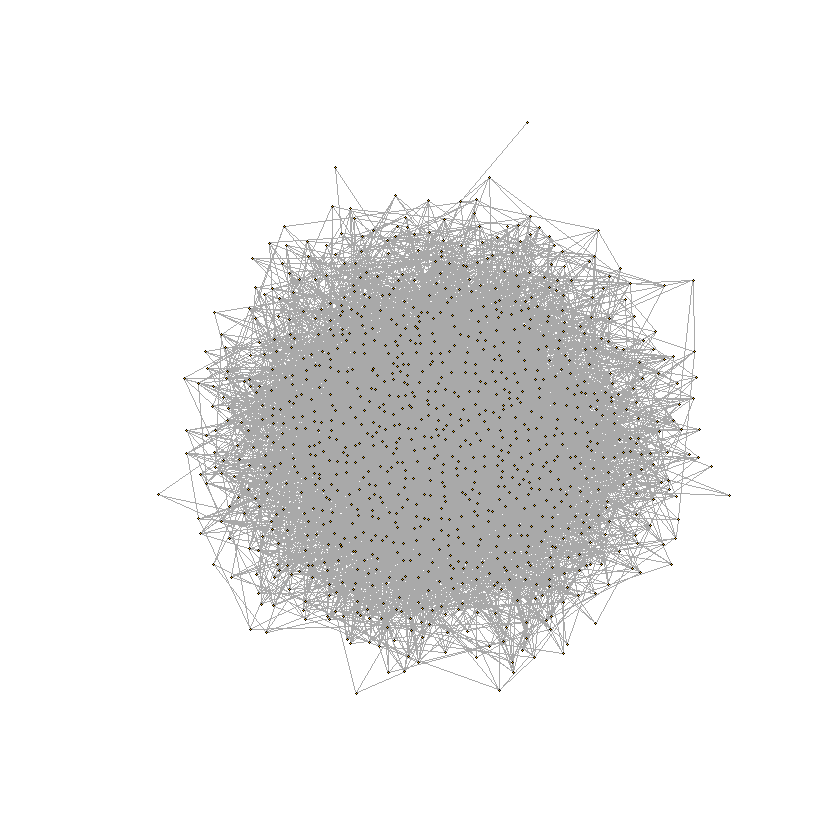

[1] "Mean:  10.03"
[1] "Variance:  9.80890890890891"
[1] "All realizations connected:  FALSE"
[1] "Probability to be connected:  0.99"
[1] "Diameter of GCC:  6"


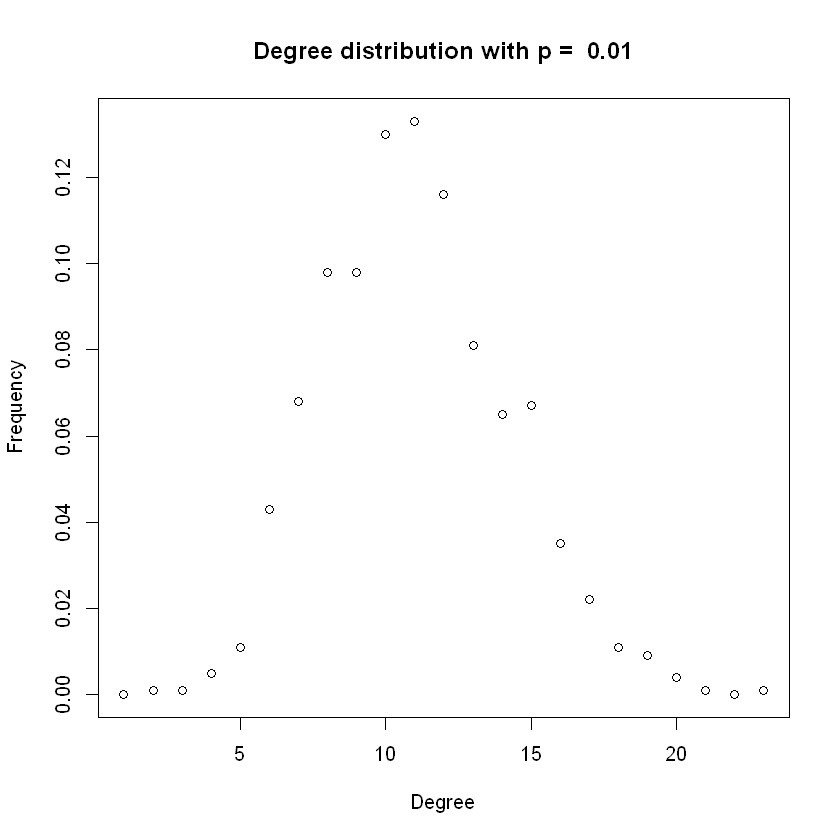

In [11]:
er_1ab(p=0.01)

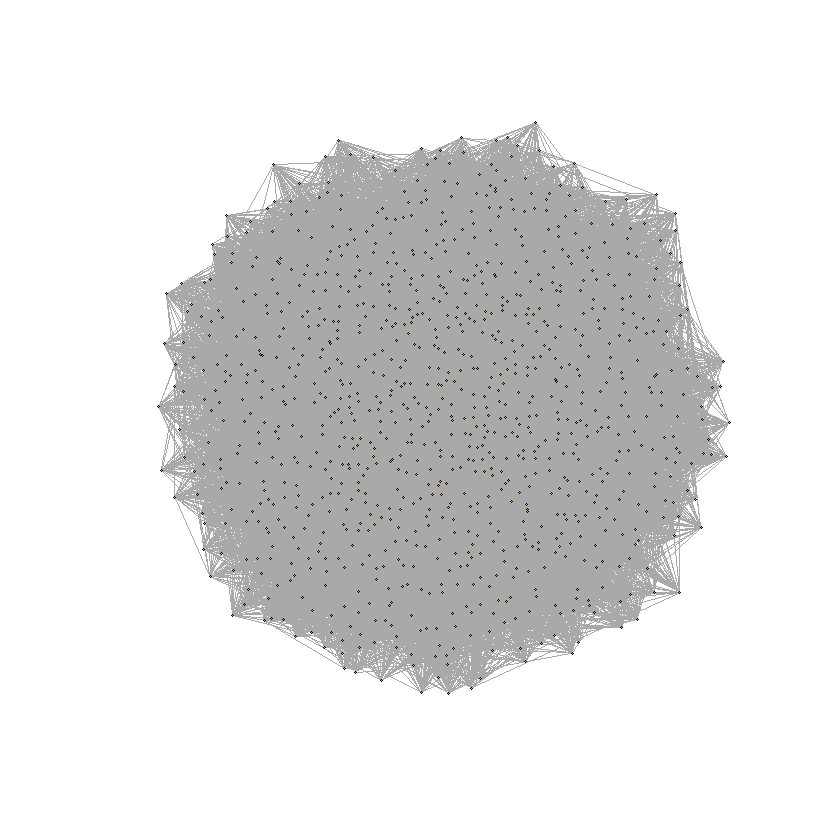

[1] "Mean:  50.012"
[1] "Variance:  48.4182742742743"
[1] "All realizations connected:  TRUE"
[1] "Probability to be connected:  1"


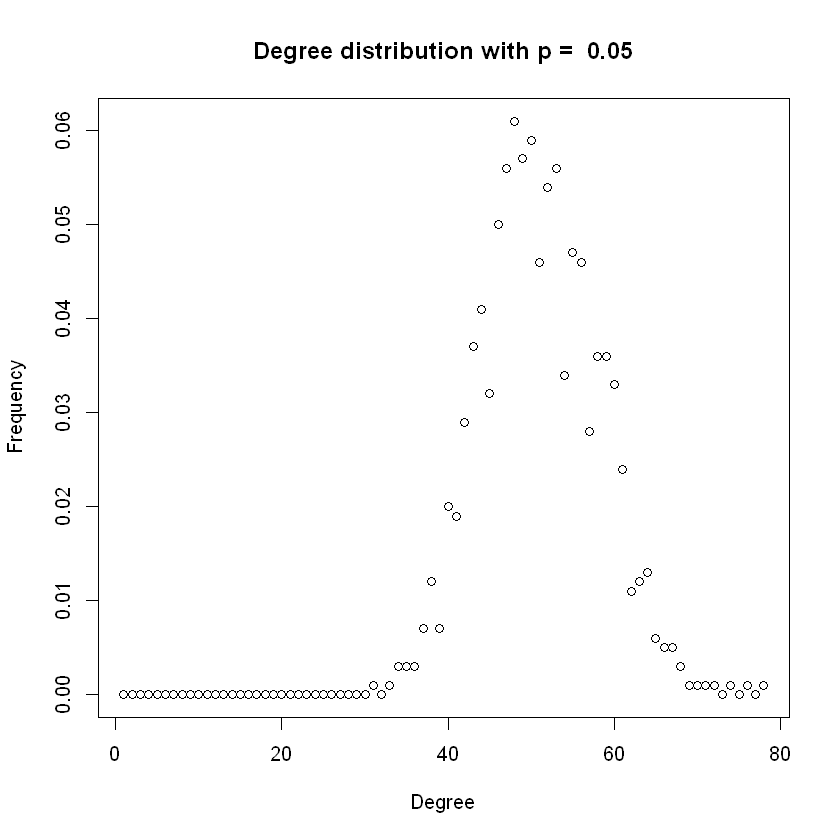

In [12]:
er_1ab(p=0.05)

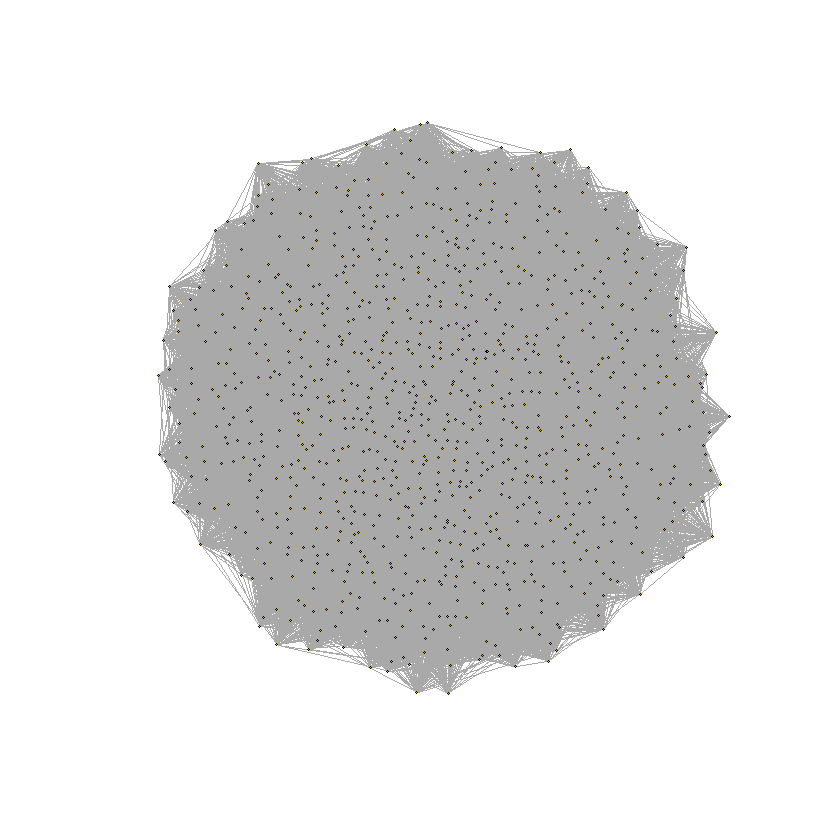

[1] "Mean:  100.184"
[1] "Variance:  91.3514954954955"
[1] "All realizations connected:  TRUE"
[1] "Probability to be connected:  1"


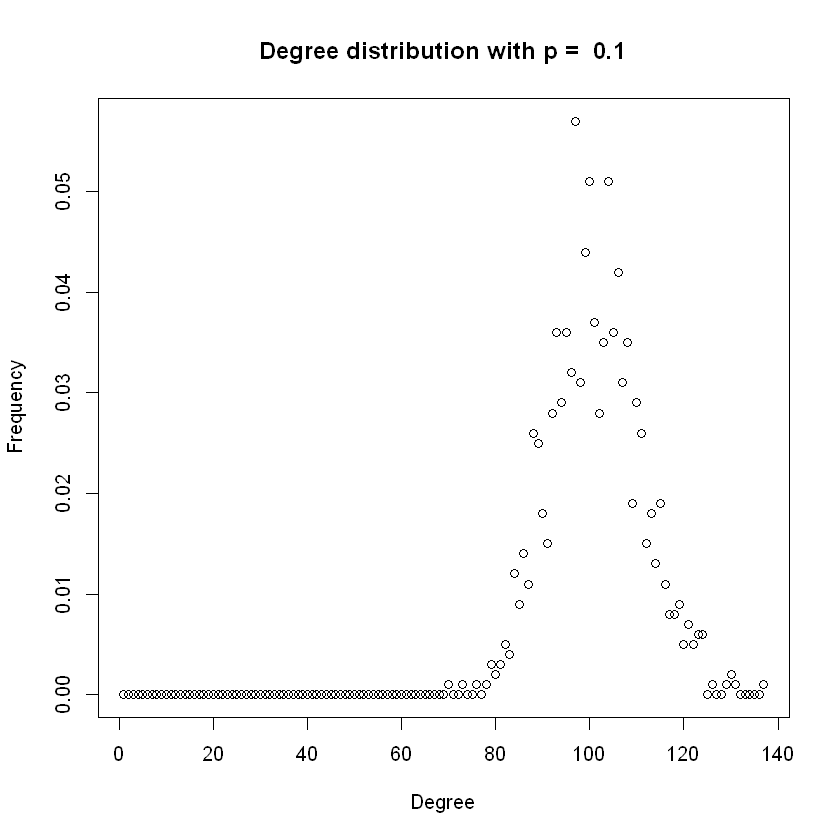

In [13]:
er_1ab(p=0.1)

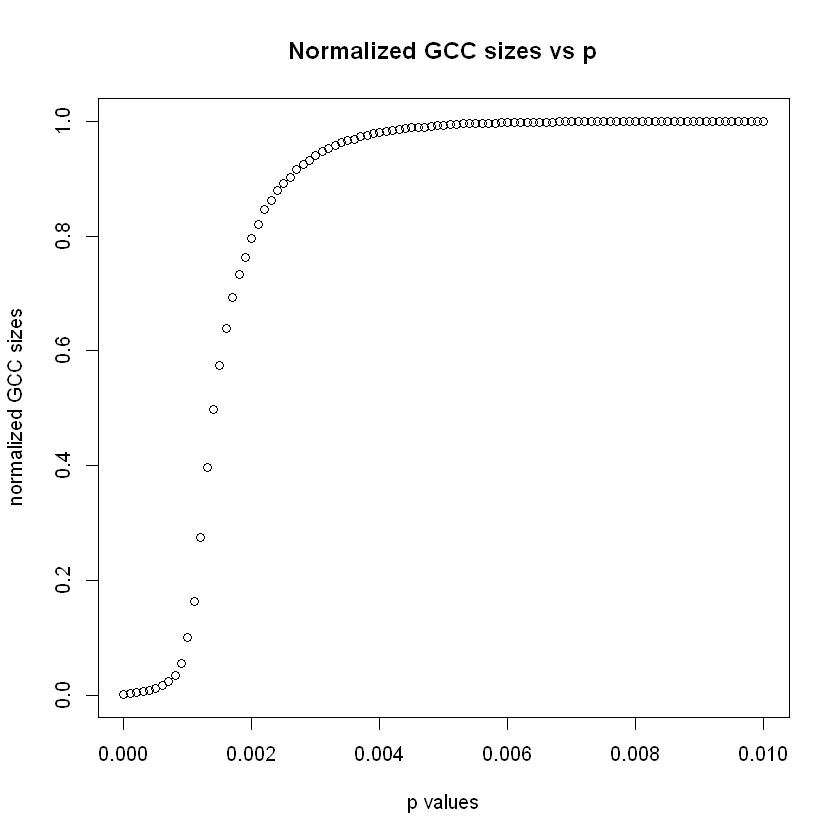

In [14]:
er_1c()

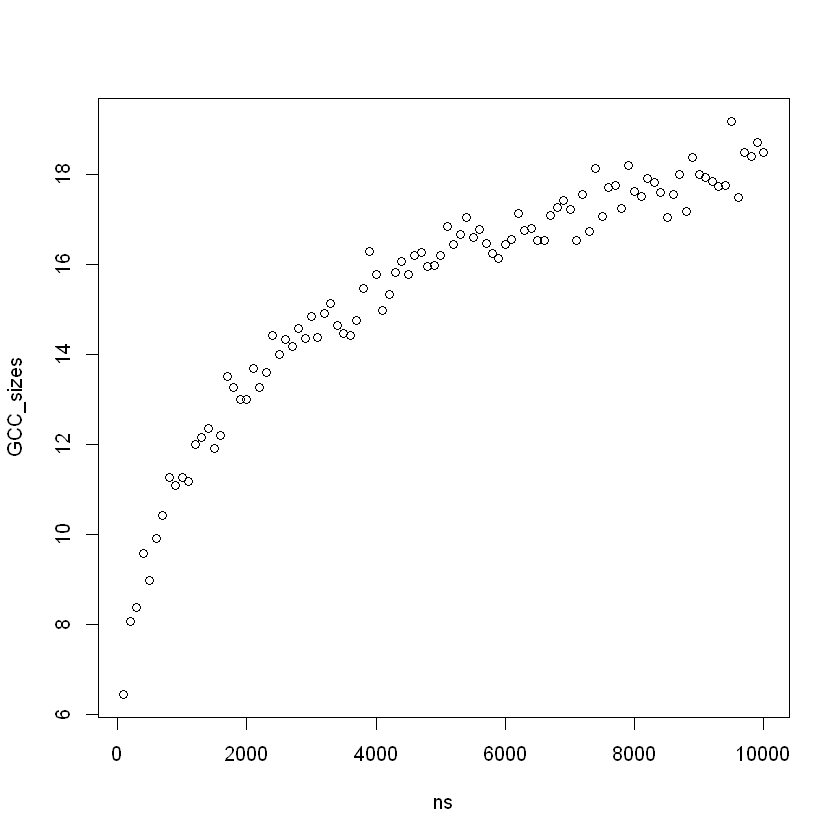

In [15]:
er_1d(c=0.5)

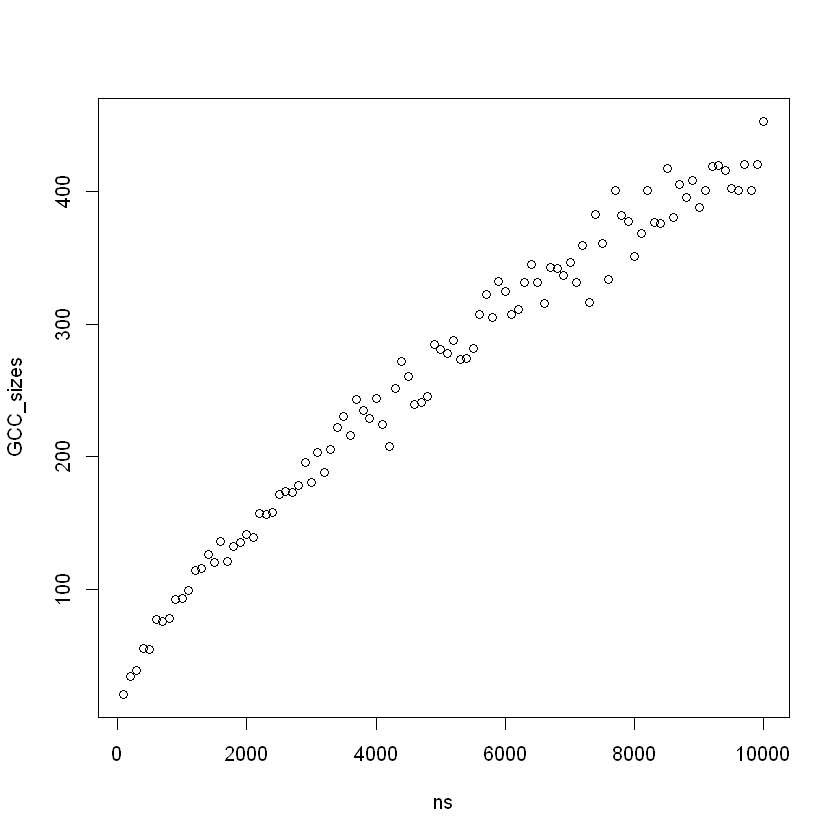

In [16]:
er_1d(c=1)

[1] "Problem 1 end"


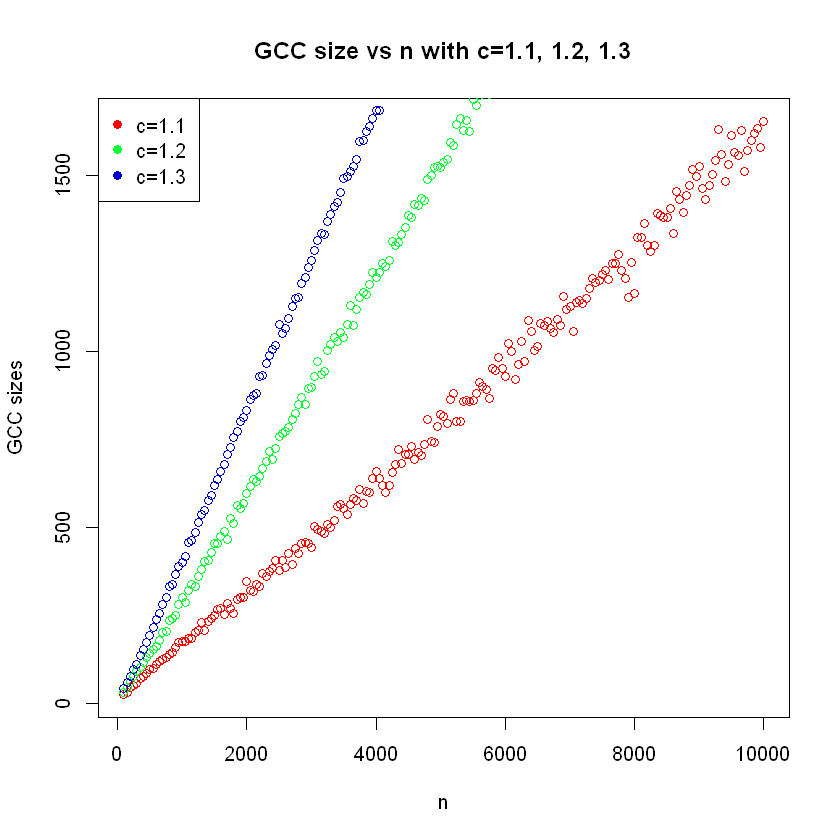

In [29]:
er_1dAlt()
print("Problem 1 end")

In [14]:
# TA-provided helper functions
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    for(i in 1:num_steps){
        #fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)        
    }
    
    return(v)
}

# part 2 problem 1
er_rw = function(n=1000, p=0.01, steps=20, iterations=1000) {
    set.seed(0)
    # 1a
    g = erdos.renyi.game(n, p, directed=F)
    
    # 1b
    GCC = get_GCC(g)
    
    transition_matrix = create_transition_matrix(GCC)
    
    distance_matrix = shortest.paths(GCC, v=V(GCC), to=V(GCC))
    
    end_nodes = c()
    means = c()
    vars = c()
    for (t in 1:steps) {
        distances = c()
        for (i in 1: iterations) {
            start = sample(vcount(GCC), 1)
            end = random_walk(GCC, t, start, transition_matrix)
            shortest_distance = distance_matrix[start, end]
            distances = c(distances, shortest_distance)
            end_nodes = c(end_nodes, end)
        }
        means = c(means, mean(distances))
        vars = c(vars, mean((distances - mean(distances))**2))
    }
    
    
    plot((1:steps), means, main="<s(t)> vs t", xlab="t", ylab="<s(t)>")
    plot((1:steps), vars, main="sigma^2(t) vs t", xlab="t", ylab="sigma^2(t)")
    
    # 1c
    plot(degree_distribution(GCC), main="Degree Distribution of the Graph")
    plot(degree_distribution(GCC, v=end_nodes), main="Degree Distribution of End Nodes in the Graph")
}

er_rw2 = function(n=10000, p=0.01, steps=20, iterations=1000) {
    set.seed(1)
    g = erdos.renyi.game(n, p, directed=F)
    GCC = get_GCC(g)
    transition_matrix = create_transition_matrix(GCC)
    distance_matrix = shortest.paths(GCC, v=V(GCC), to=V(GCC))
    
    means = c()
    vars = c()
    for (t in 1:steps) {
        distances = c()
        for (i in 1: iterations) {
            start = sample(vcount(GCC), 1)
            end = random_walk(GCC, t, start, transition_matrix)
            shortest_distance = distance_matrix[start, end]
            distances = c(distances, shortest_distance)
        }
        means = c(means, mean(distances))
        vars = c(vars, mean((distances - mean(distances))**2))
    }
    
    plot((1:steps), means, main="10000 node <s(t)> vs t", xlab="t", ylab="<s(t)>")
    plot((1:steps), vars, main="10000 node sigma^2(t) vs t", xlab="t", ylab="sigma^2(t)")
}

tele_random_walk = function (g, num_steps, start_node, transition_matrix = NULL, alpha = 0.15){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)

    v = start_node
    for(i in 1:num_steps){
#         fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        PMF = transition_matrix[v, ]
        tele = sample(100,1)
        if (tele > 15) {
            v = sample(1:vcount(g), 1, prob = PMF)
        } else {
            v = sample(1:vcount(g), 1)
        }
    }

    return(v)
}

pr_no_tp = function(n=1000, m=4, steps=10, iterations=5000) {
    set.seed(66)
    g1 = barabasi.game(1000, m=4, directed=TRUE)
    set.seed(99)
    g2 = barabasi.game(1000, m=4, directed=TRUE)
    a = as_edgelist(g2)
    set.seed(88)
    t1 = sample(a)
    g3 = add_edges(g1, t1)

    ends = c()
    t_mat = create_transition_matrix(g3)

    for(i in 1:iterations){
        startV = sample(1:vcount(g3),1)
        endV = random_walk(g3, 10, startV, t_mat)
        ends = c(ends, endV)
    }
    probs = rep(0,n)
    for (end in ends) {
        probs[end] = probs[[end]] + 1 / iterations
    }
    plot(probs, main="Probability of Visiting Every Node")
    plot(degree(g3), main="Degree Distribution of the Graph")
}

pr_tp = function(n=1000, m=4, steps=10, iterations=5000) {
    ends = c()
    t_mat = create_transition_matrix(g3)
    for(i in 1:iterations){
        startV = sample(1:vcount(g3),1)
        endV = tele_random_walk(g3, 10, startV, t_mat)
        ends = c(ends, endV)
    }
    probs = rep(0,n)
    for (end in ends) {
        probs[end] = probs[[end]] + 1 / iterations
    }
    plot(probs, main="Probability of Visiting Every Node With Teleportation")
    plot(degree(g3), main="Degree Distribution of the Graph")
}

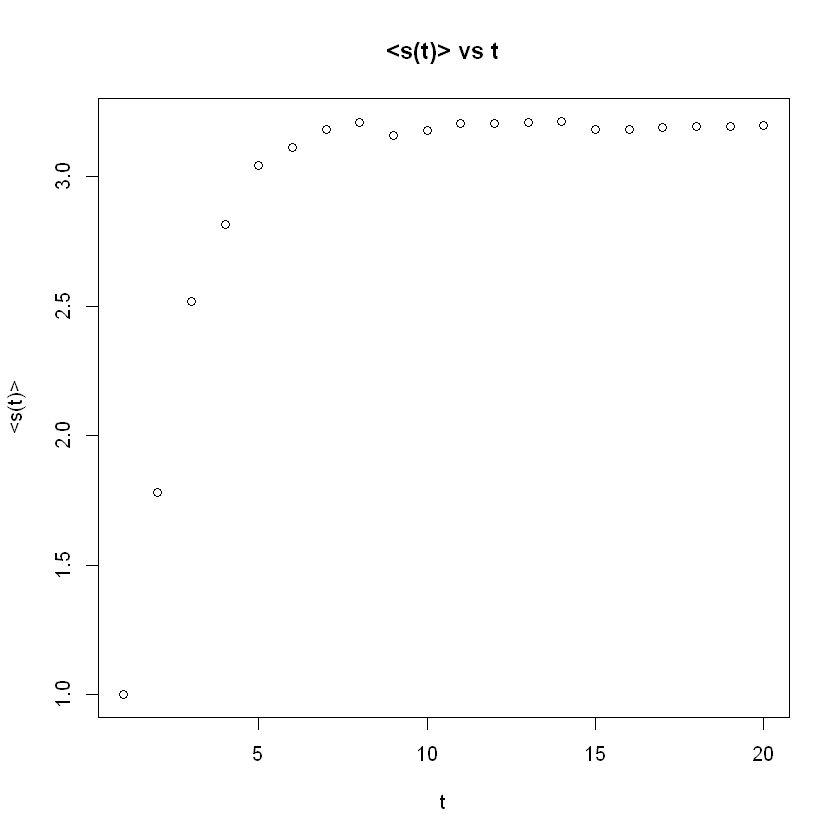

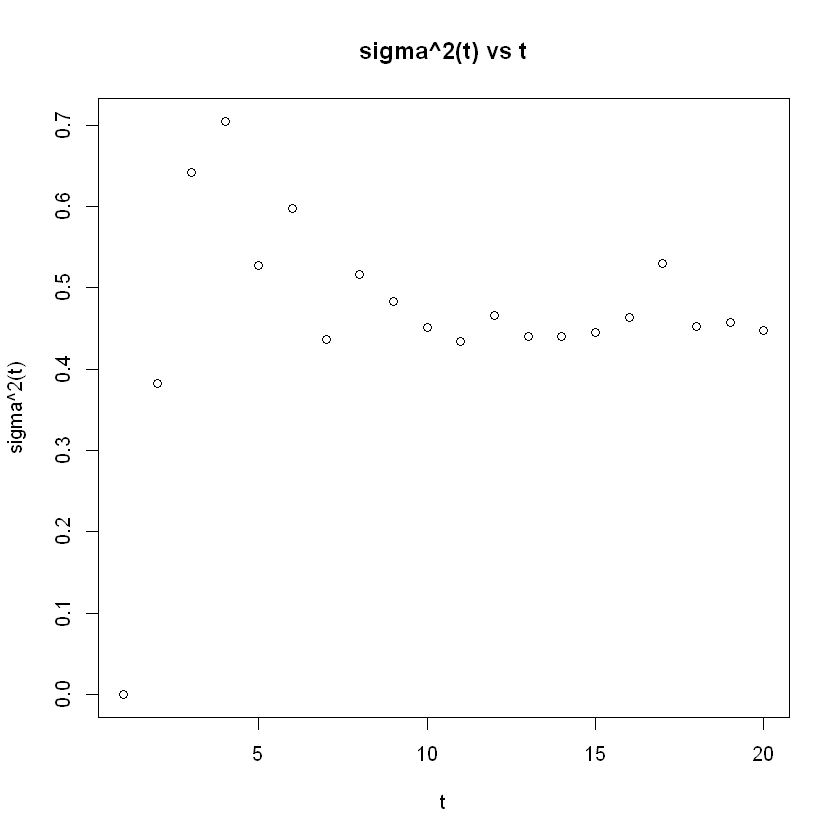

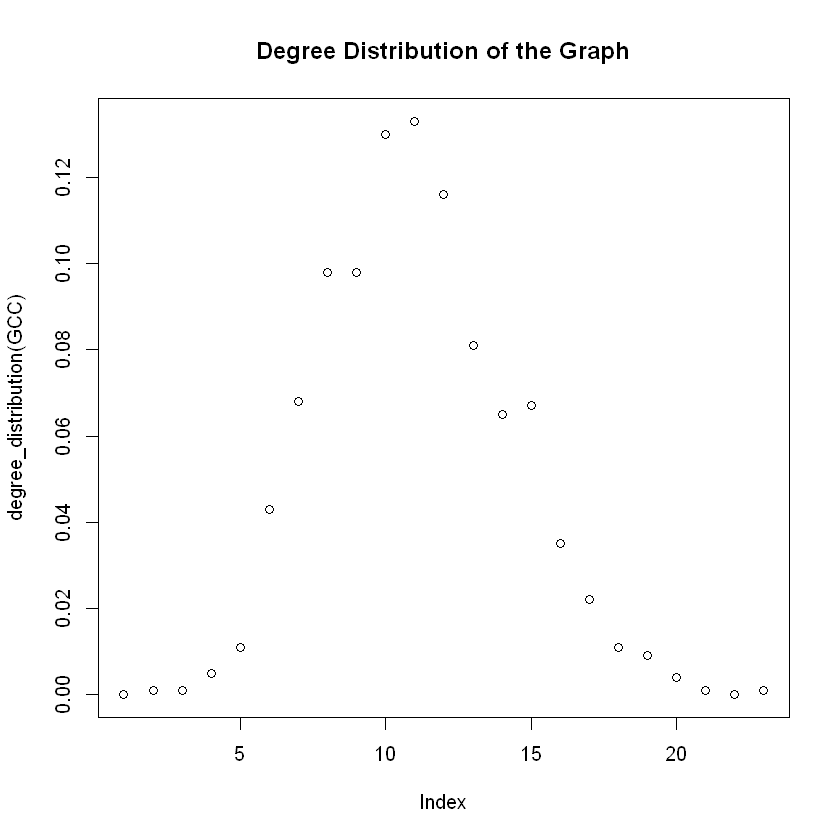

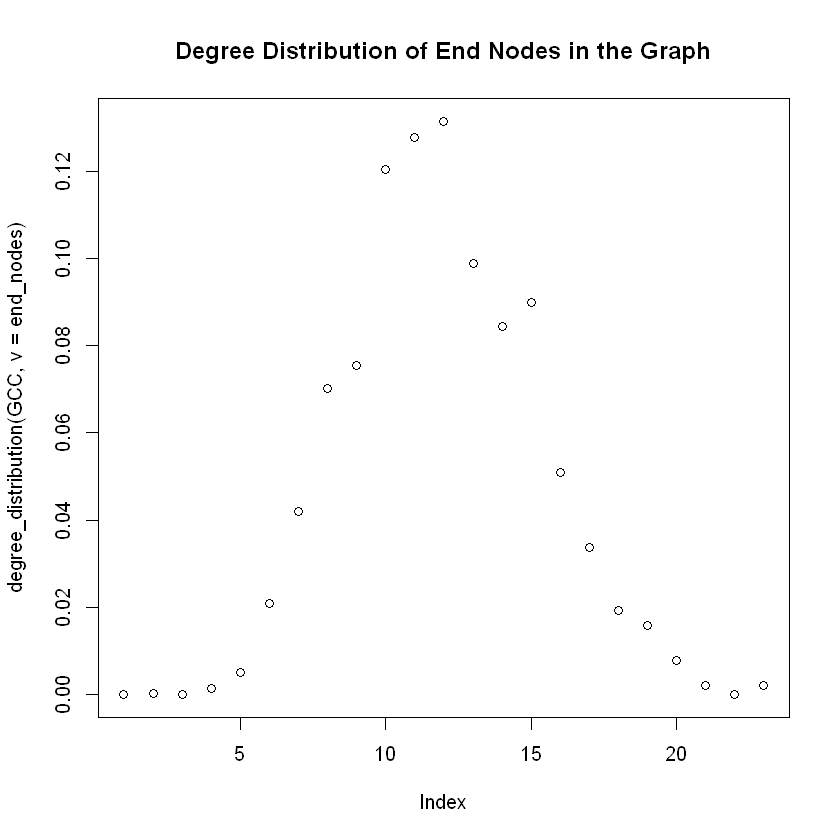

In [174]:
er_rw()

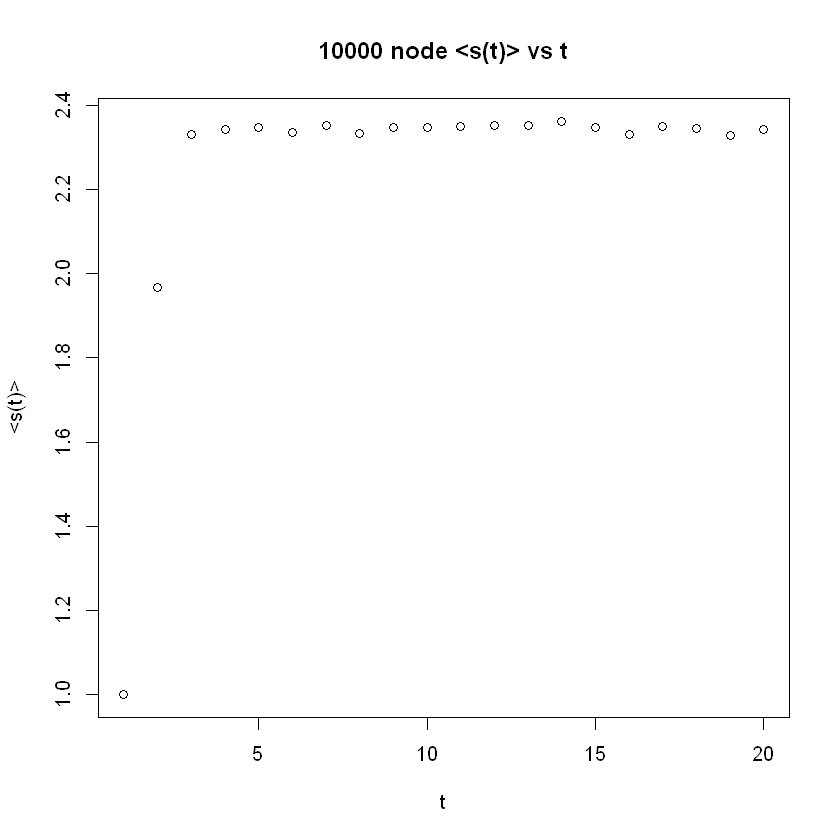

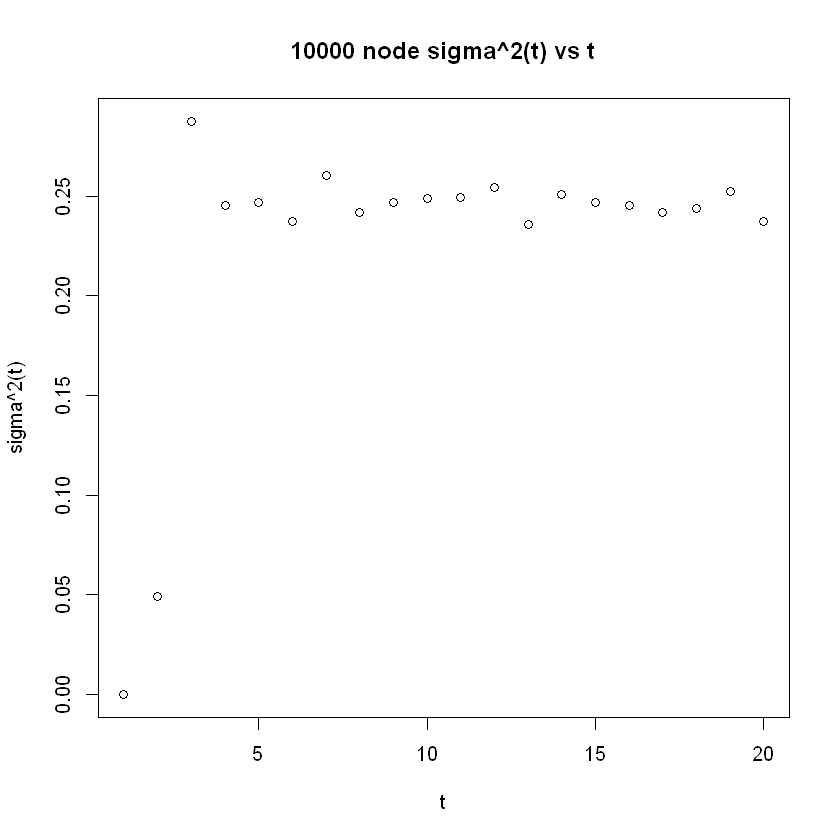

In [175]:
er_rw2()

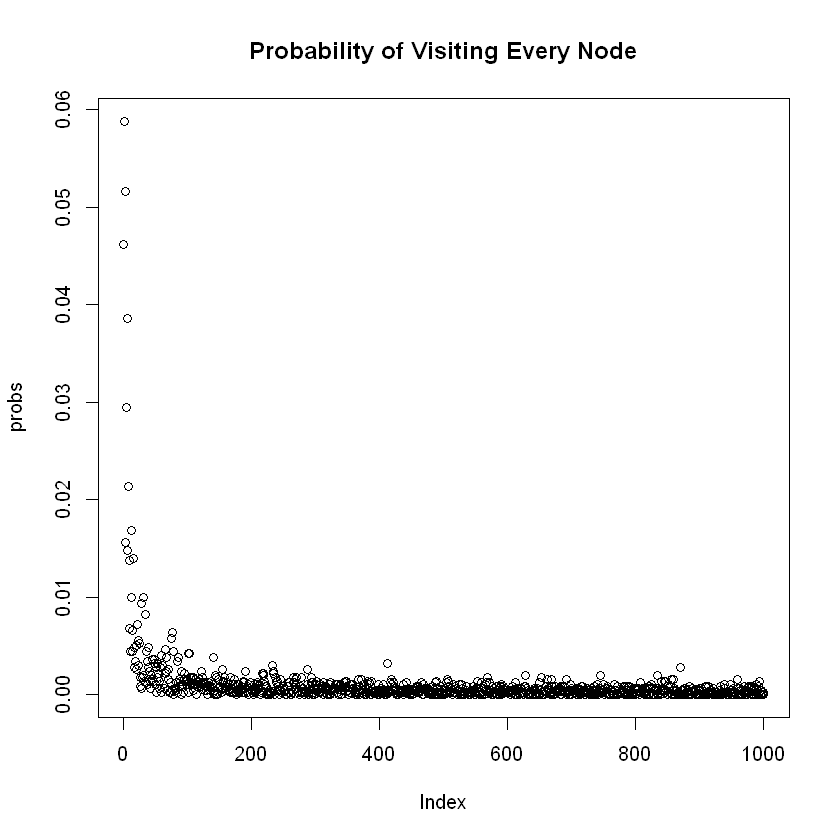

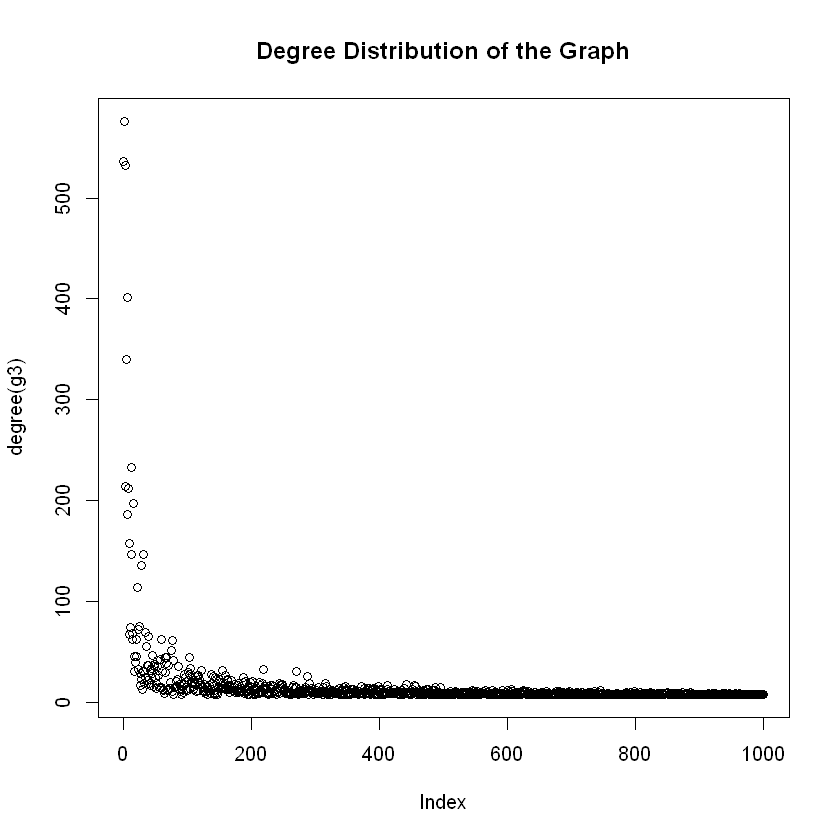

In [15]:
pr_no_tp()

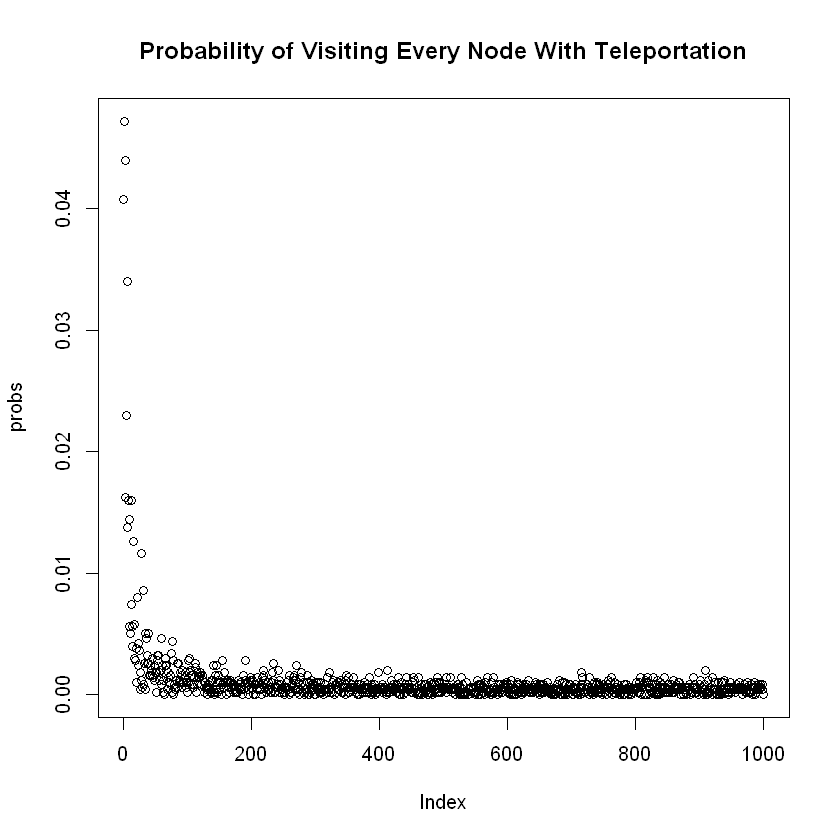

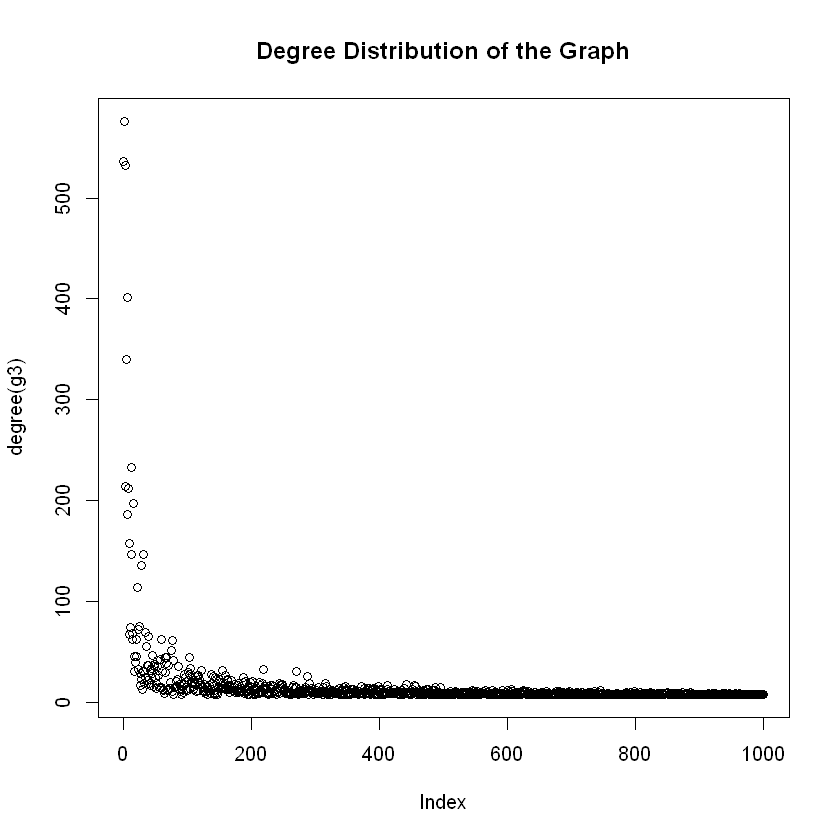

In [16]:
pr_tp()